Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection and Analysis

PIMA Diabetes Dataset

In [2]:
df = pd.read_csv('diabetes.csv') 

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
zero_counts = (df == 0).sum()

# print the result
print(zero_counts)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


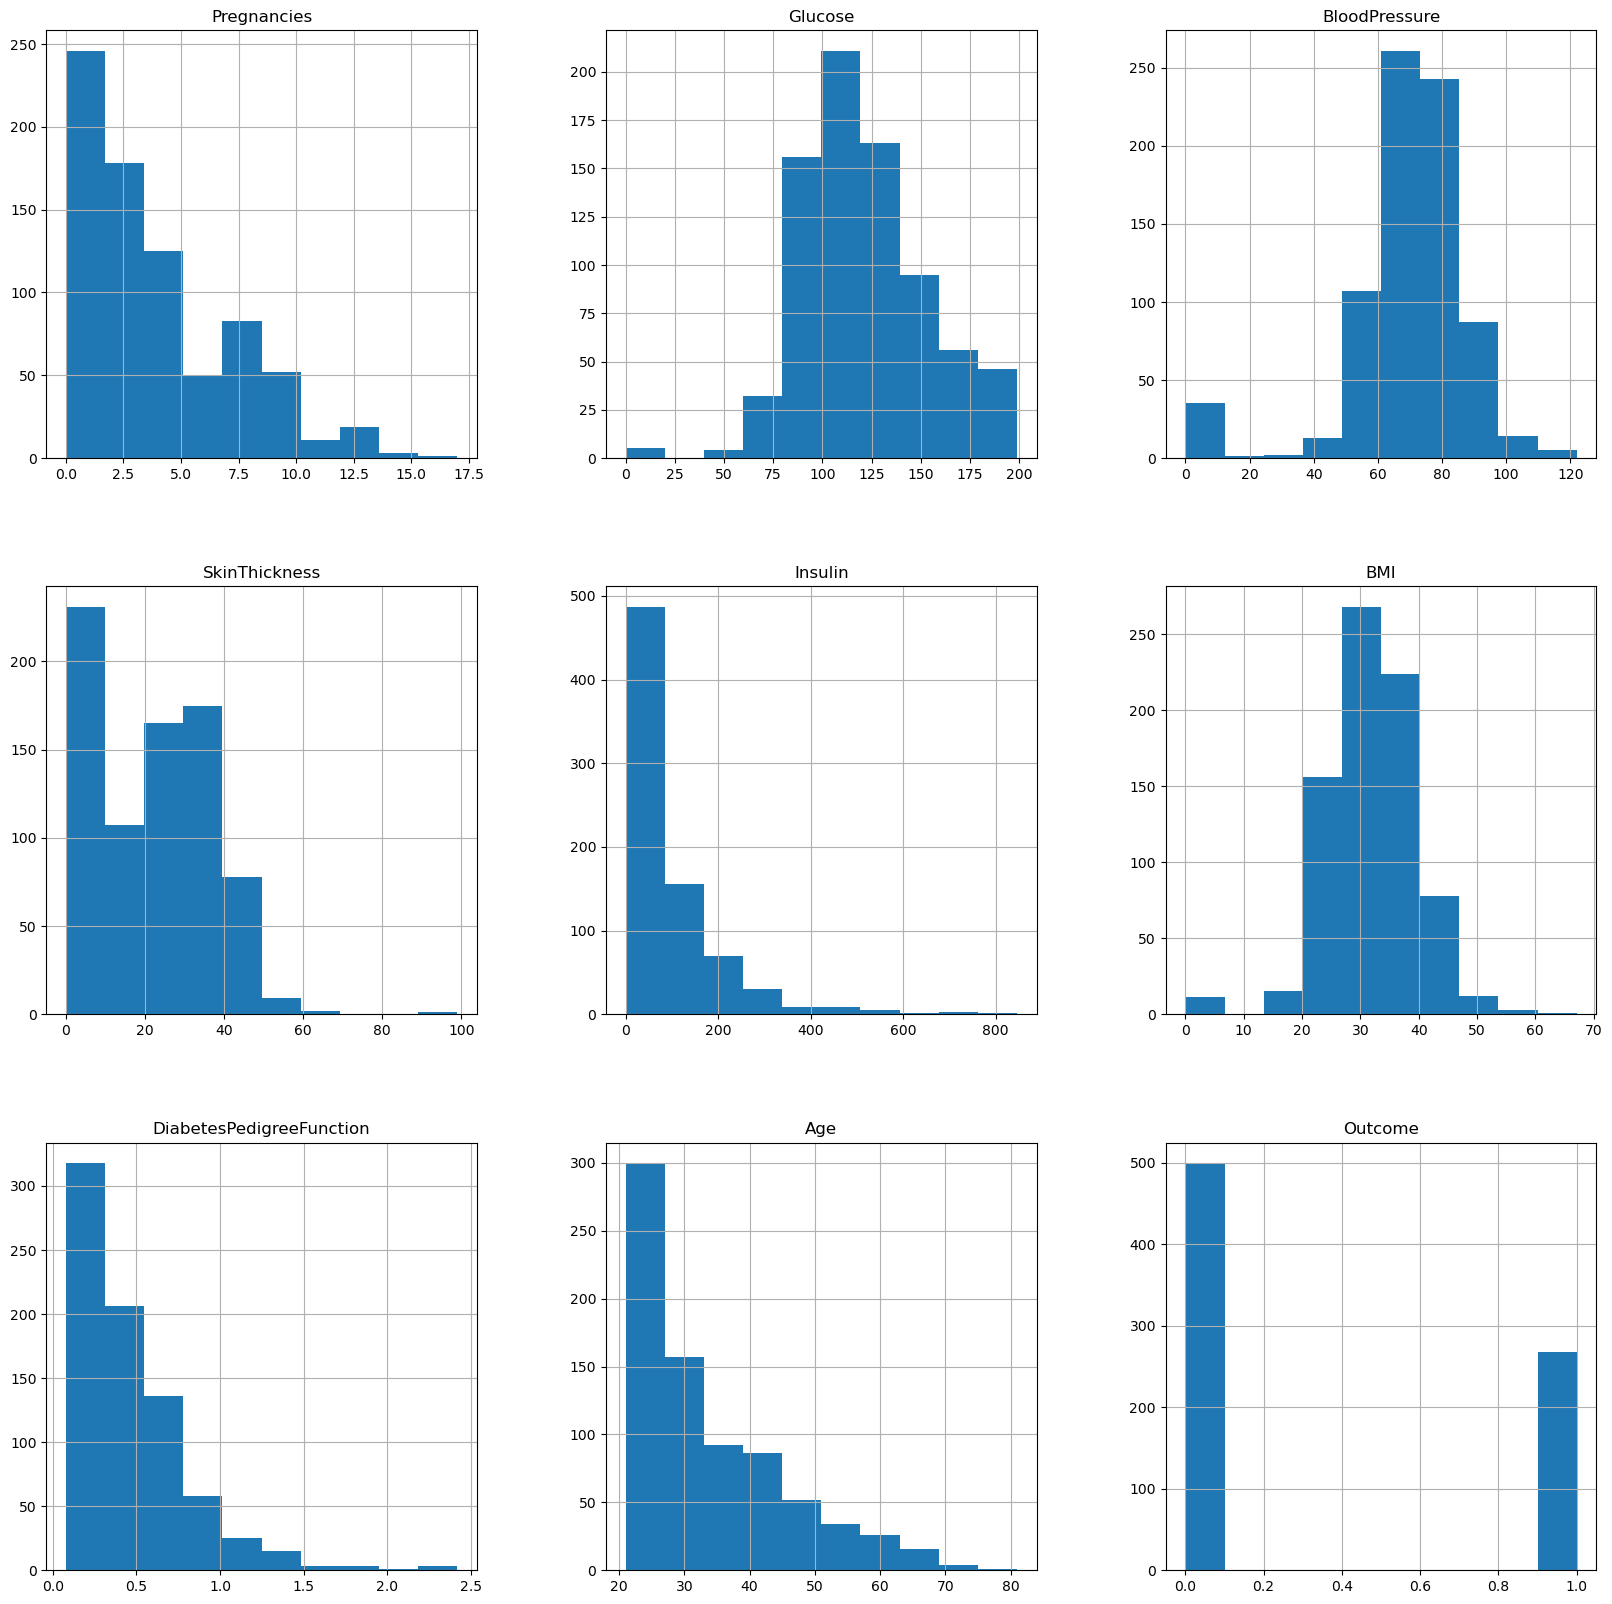

In [7]:
p = df.hist(figsize = (20,20))

In [8]:
df = df.drop(df[df['BMI'] == 0].index)
df = df.drop(df[df['Glucose'] == 0].index)

In [9]:

df['BloodPressure'] = df['BloodPressure'].replace(0, pd.NaT)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)


In [10]:
df['SkinThickness'] = df['SkinThickness'].replace(0, pd.NaT)
df['Insulin'] = df['Insulin'].replace(0, pd.NaT)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)

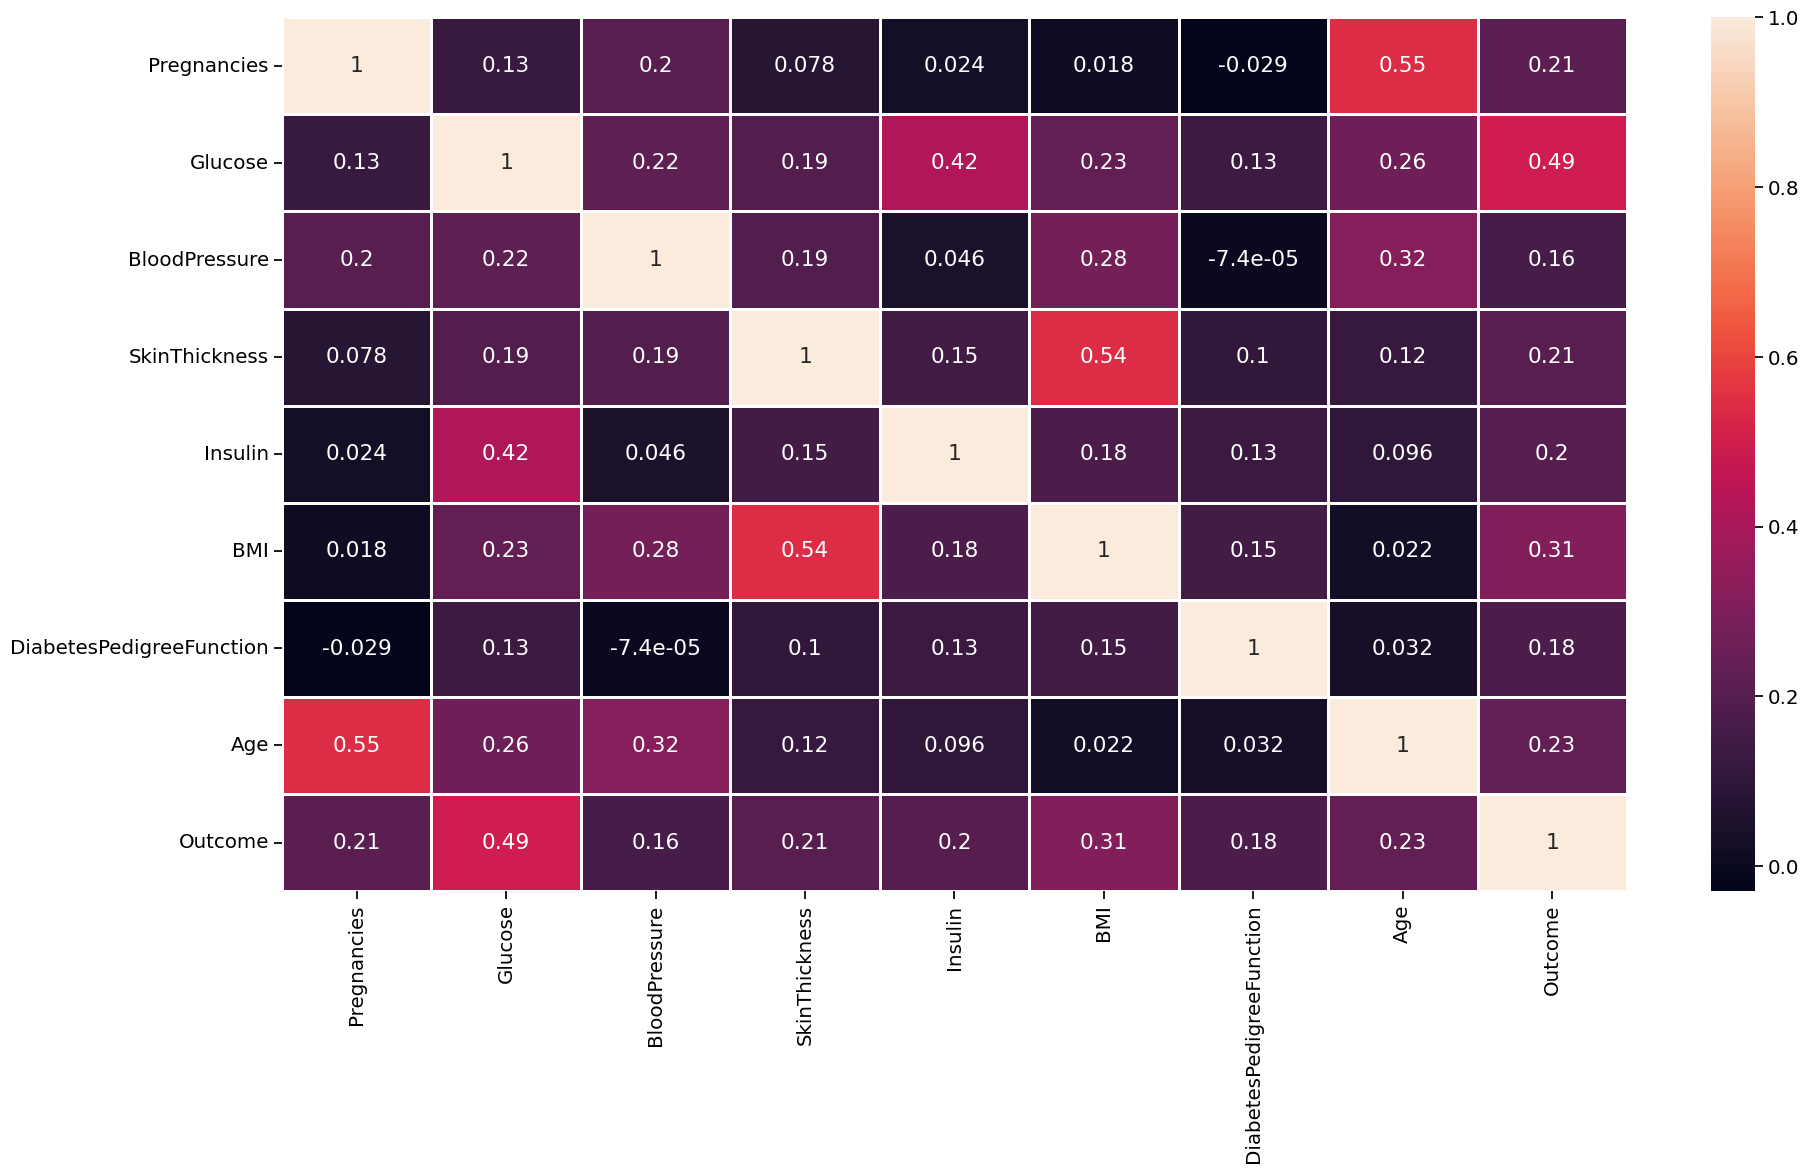

In [11]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(df.corr(),annot=True,linewidth =2)
plt.tight_layout()


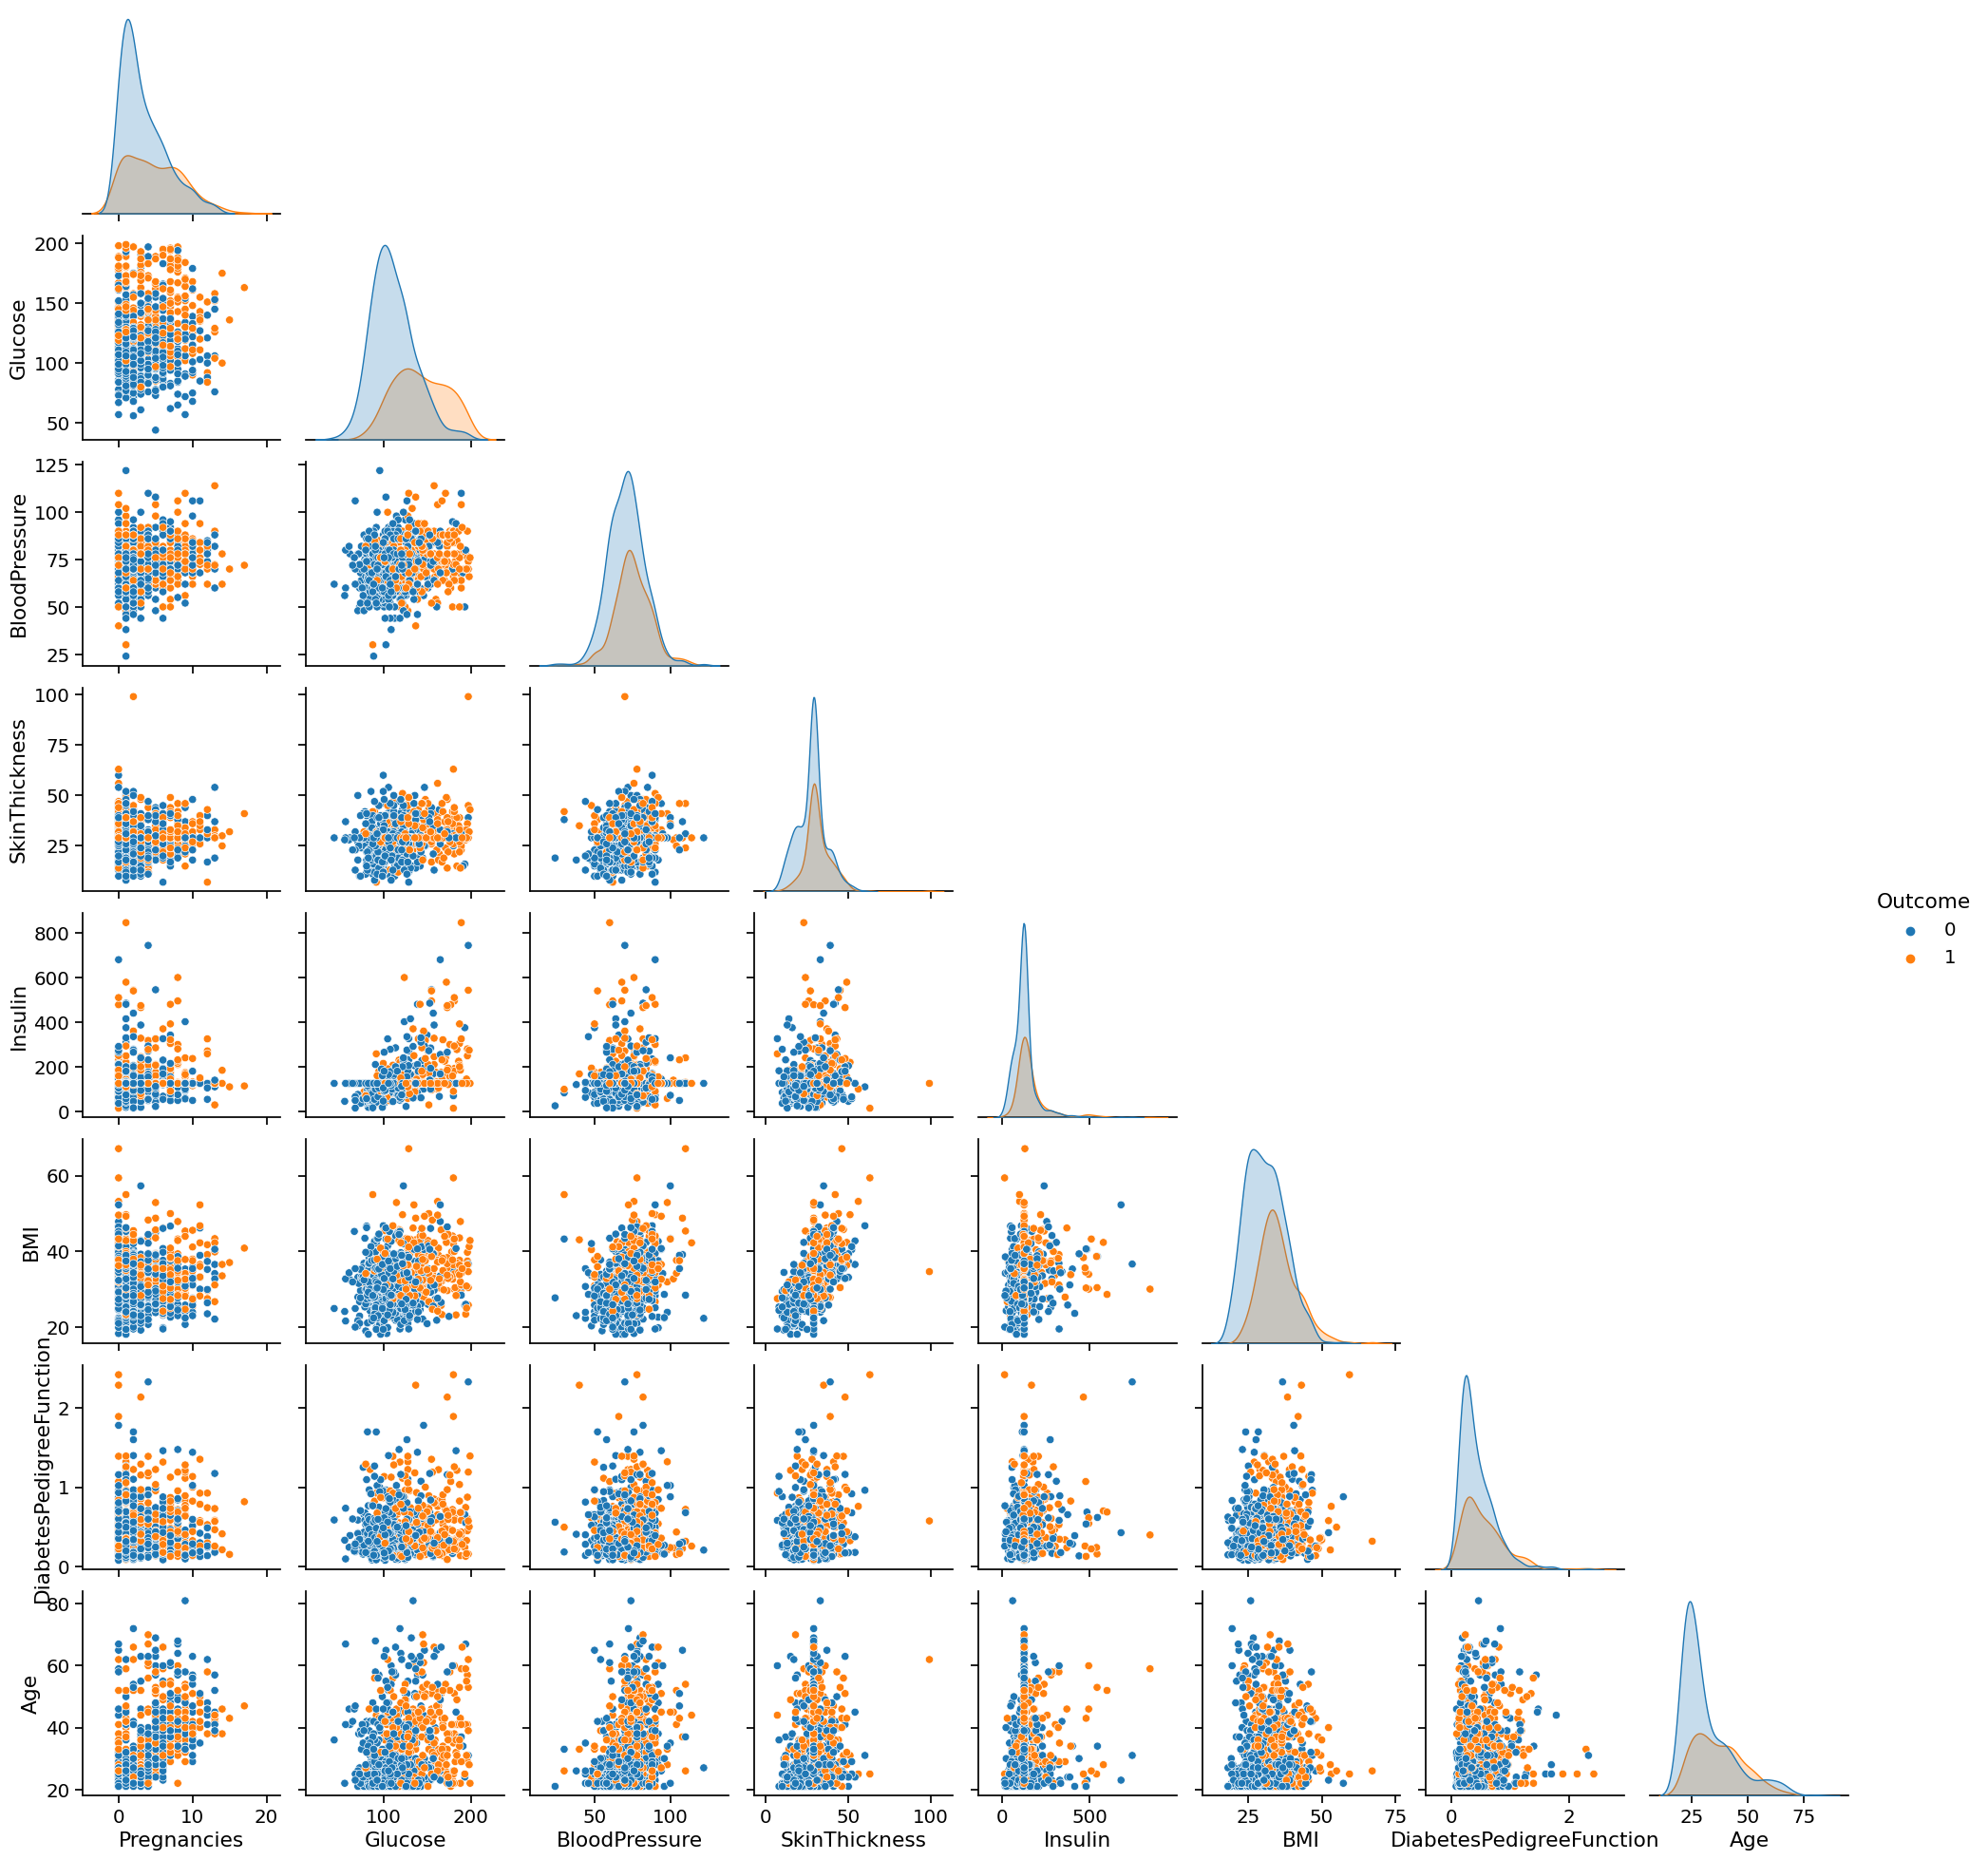

In [12]:
sns.pairplot(df, hue='Outcome', palette="tab10", corner=True)
plt.show()

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,3.851064,121.941489,72.400552,29.122340,141.428191,32.454654,0.473051,33.312500,0.351064
std,3.375189,30.601198,12.146895,8.852448,87.100369,6.928926,0.330108,11.709395,0.477621
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,120.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.500000,32.300000,0.377000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


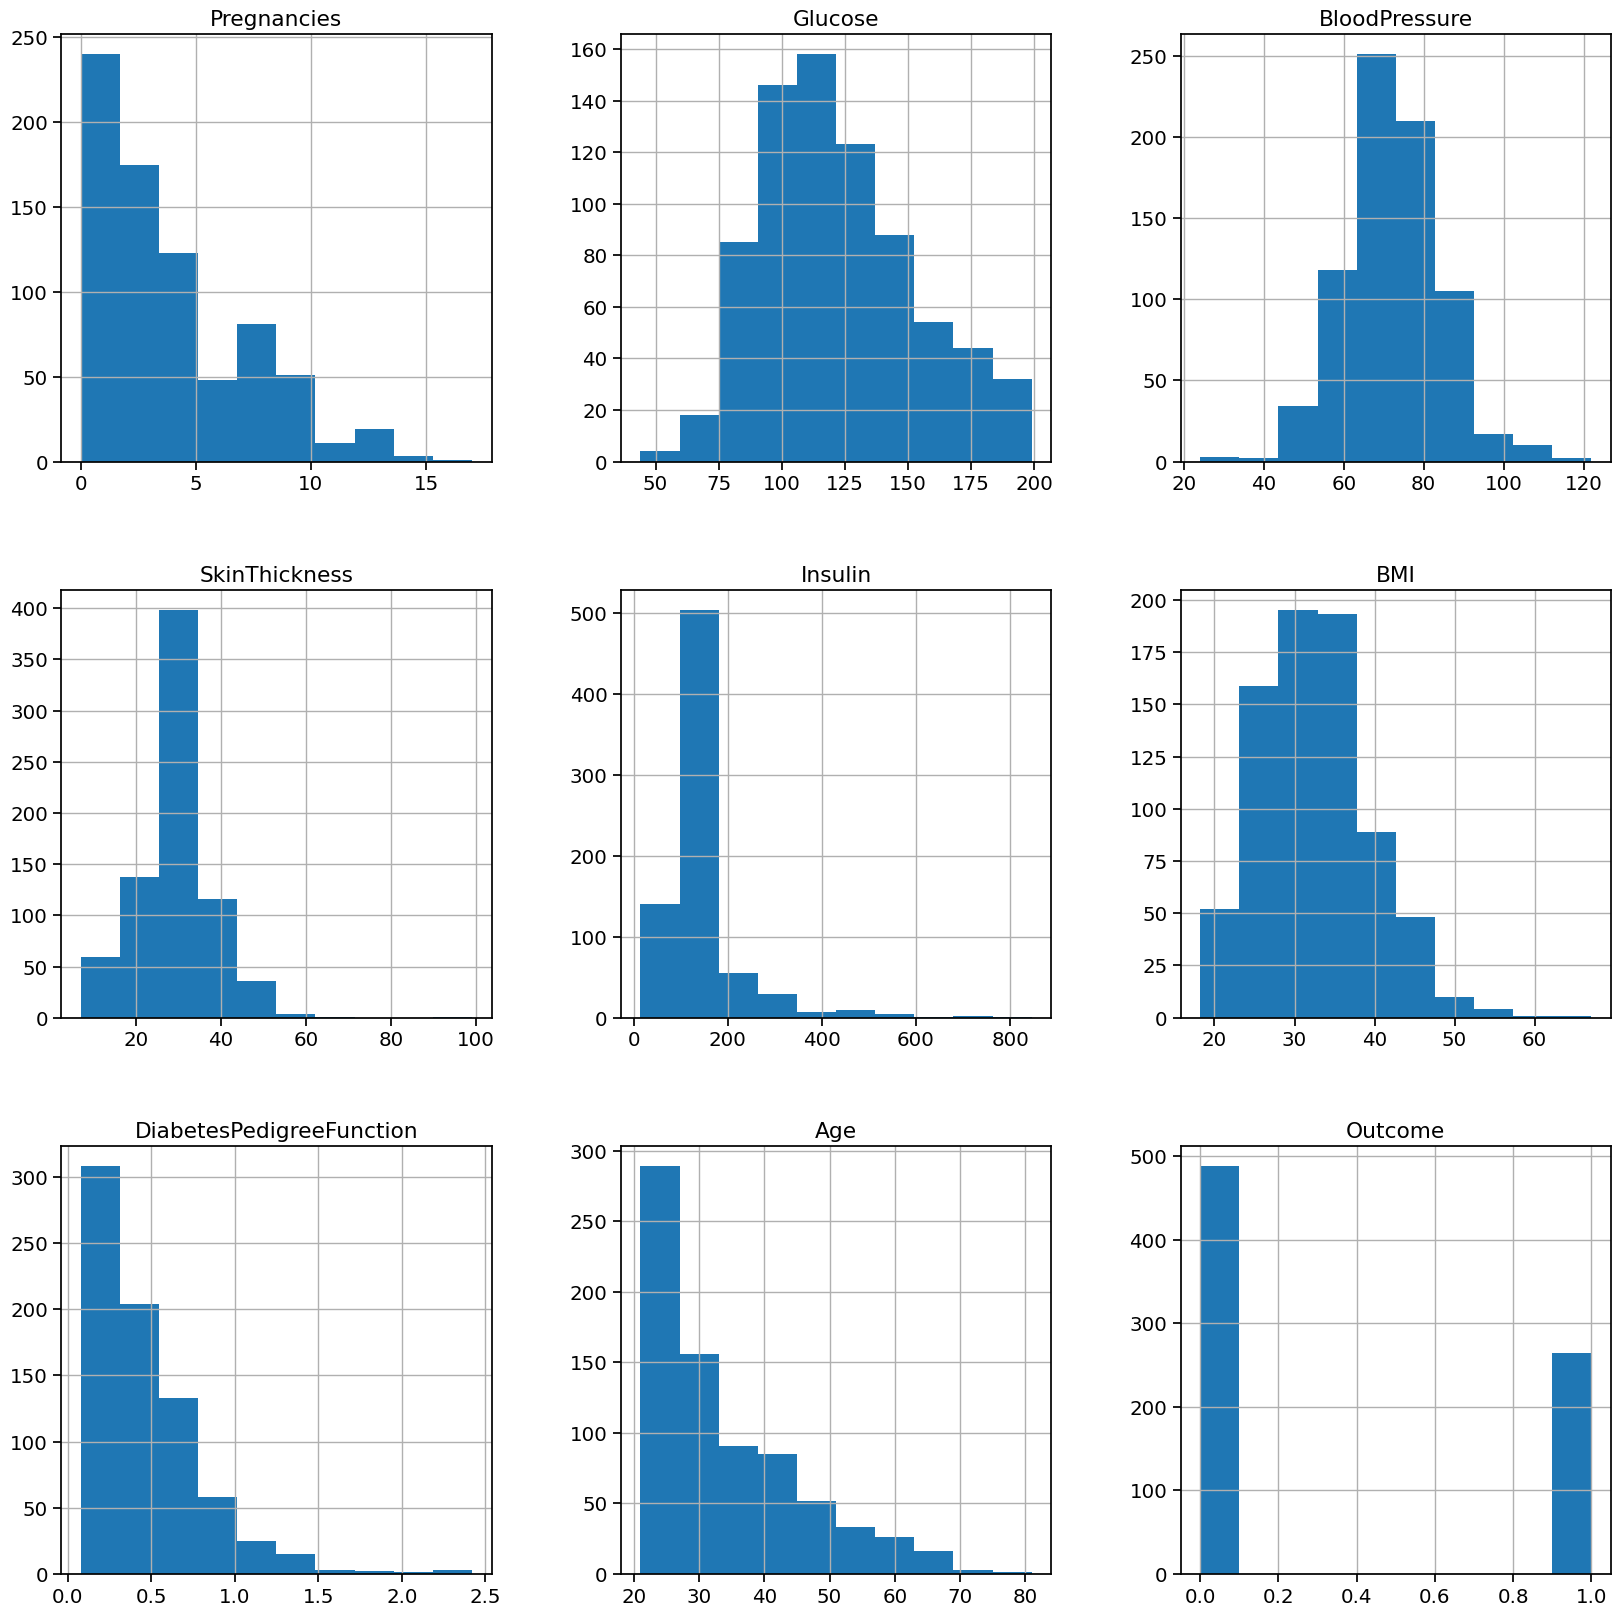

In [14]:
p = df.hist(figsize = (20,20))

In [15]:
zero_counts = (df == 0).sum()

# print the result
print(zero_counts)

Pregnancies                 108
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     488
dtype: int64


In [16]:
df['Outcome'].value_counts()

0    488
1    264
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [17]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.321721,110.825820,70.947146,27.743852,128.375000,30.876434,0.429848,31.309426
1,4.829545,142.488636,75.087153,31.670455,165.556818,35.371970,0.552909,37.015152


In [18]:
df.describe().loc[['min', 'max']].transpose()

,min,max
Pregnancies,0.000,17.00
Glucose,44.000,199.00
BloodPressure,24.000,122.00
SkinThickness,7.000,99.00
Insulin,14.000,846.00
BMI,18.200,67.10
DiabetesPedigreeFunction,0.078,2.42
Age,21.000,81.00
Outcome,0.000,1.00


In [19]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [20]:

X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

In [21]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148           72.0           35.0    125.5  33.6   
1              1       85           66.0           29.0    125.5  26.6   
2              8      183           64.0           29.0    125.5  23.3   
3              1       89           66.0           23.0     94.0  28.1   
4              0      137           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101           76.0           48.0    180.0  32.9   
764            2      122           70.0           27.0    125.5  36.8   
765            5      121           72.0           23.0    112.0  26.2   
766            1      126           60.0           29.0    125.5  30.1   
767            1       93           70.0           31.0    125.5  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [22]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 752, dtype: int64


Train Test Split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(752, 8) (601, 8) (151, 8)


In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
classifier = SVC(kernel='linear', C=1, random_state=42)
classifier.fit(X_train_scaled, Y_train)

SVC(C=1, kernel='linear', random_state=42)

Training the Model

In [27]:
# classifier = svm.SVC(kernel='linear')

In [28]:
#training the support vector Machine Classifier
# classifier.fit(X_train, Y_train)

Model Evaluation

Accuracy Score

In [29]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train_scaled)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [30]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.757071547420965


In [31]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test_scaled)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [32]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8278145695364238


Making a Predictive System

In [33]:
input_data = (5,166,72,19,175,25.8,0.587,51)

input_data_as_numpy_array = np.asarray(input_data)


input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
new_input_scaled = scaler.transform(input_data_reshaped)

prediction = classifier.predict(new_input_scaled)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [34]:
import pickle

In [35]:
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))